In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [43]:
# Loading the  dataset
df = pd.read_csv('Netflix Inc. (NFLX) Stock Price 2002-2025.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 5729 entries, 5728 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5729 non-null   datetime64[ns]
 1   Open       5729 non-null   object        
 2   High       5727 non-null   object        
 3   Low        5727 non-null   object        
 4   Close      5727 non-null   object        
 5   Adj Close  5727 non-null   object        
 6   Volume     5727 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 358.1+ KB
None
           Date Open   High   Low Close Adj Close       Volume
5728 2002-05-23  1.16  1.24  1.15   1.2       1.2  104,790,000
5727 2002-05-24  1.21  1.23   1.2  1.21      1.21   11,104,800
5726 2002-05-28  1.21  1.23  1.16  1.16      1.16    6,609,400
5725 2002-05-29  1.16  1.16  1.09   1.1       1.1    6,757,800
5724 2002-05-30  1.11  1.11  1.07  1.07      1.07   10,154,200


In [44]:
# Check for missing values
print(df.isnull().sum())




Date         0
Open         0
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64


In [45]:
# Drop or fill missing values 
df.fillna(0, inplace=True) 

In [46]:
df['Close'] = pd.to_numeric(df['Close'].str.replace(',', ''), errors='coerce')

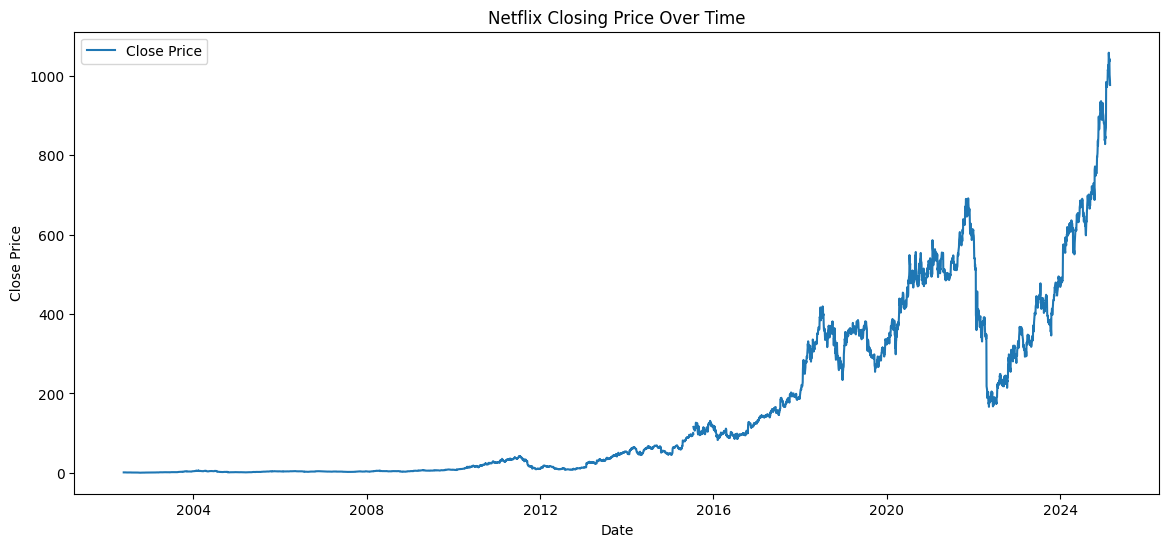

In [47]:

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Netflix Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [62]:
#feature scaling to normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])
df['Scaled_Close'] = scaled_data
print(scaled_data[:5])

[[0.00068038]
 [0.00067093]
 [0.00058588]
 [0.00051974]
 [0.00051029]]


2. Feature Engineering

In [49]:
# Create lagged closing prices (1 day, 3 day, 7 day)
df['lag_1'] = df['Close'].shift(1)
df['lag_3'] = df['Close'].shift(3)
df['lag_7'] = df['Close'].shift(7)


In [50]:
# 7-day moving average
df['ma_7'] = df['Close'].rolling(window=7).mean()

# 14-day standard deviation 
df['std_14'] = df['Close'].rolling(window=14).std()


In [ ]:
df = df.dropna().reset_index(drop=True)


In [ ]:
df[['Date', 'Close', 'lag_1', 'ma_7', 'std_14']].head(10)


,Date,Close,lag_1,ma_7,std_14
0,2002-06-12,1.09,1.15,1.138571,0.043399
1,2002-06-13,1.08,1.09,1.132857,0.041853
2,2002-06-14,0.99,1.08,1.110000,0.049525
3,2002-06-17,0.92,0.99,1.072857,0.069472
4,2002-06-18,0.91,0.92,1.042857,0.085321
5,2002-06-19,0.95,0.91,1.012857,0.092371
6,2002-06-20,0.96,0.95,0.985714,0.097172
7,2002-06-21,0.98,0.96,0.970000,0.097721
8,2002-06-24,0.98,0.98,0.955714,0.097643
9,2002-06-25,0.96,0.98,0.951429,0.094987


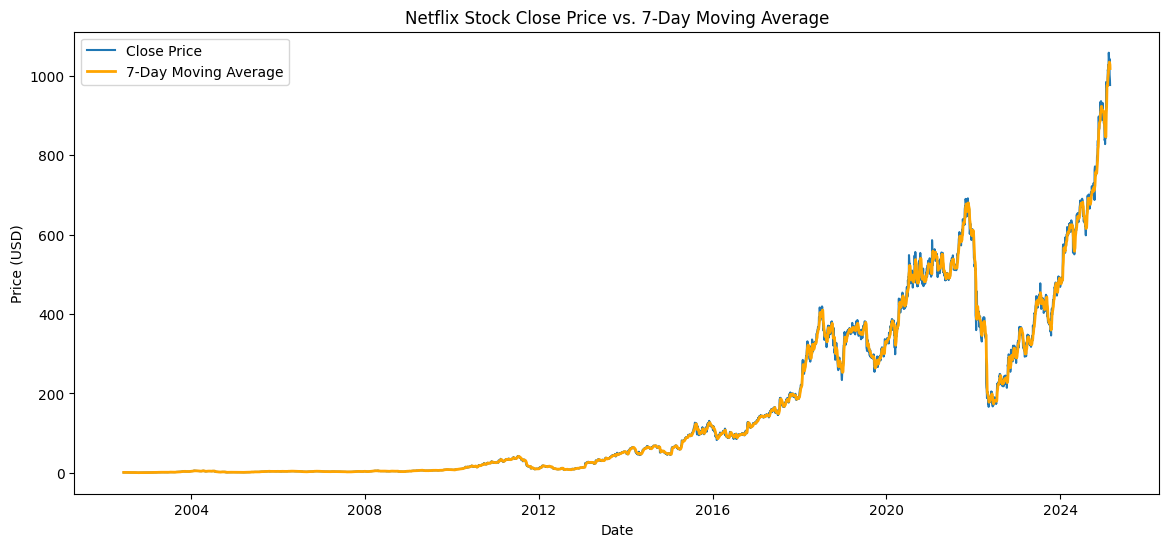

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=1.5)
plt.plot(df['Date'], df['ma_7'], label='7-Day Moving Average', color='orange', linewidth=2)
plt.title('Netflix Stock Close Price vs. 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [63]:
scaled_close = df[['Scaled_Close']].values


In [67]:
#Sequence of 60 on X and next price on Y
TIME_STEP = 60
X = []
y = []

for i in range(TIME_STEP, len(scaled_close)):
    X.append(scaled_close[i - TIME_STEP:i, 0])
    y.append(scaled_close[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print(X.shape)
print(y.shape)

(5628, 60, 1)
(5628,)


In [69]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4502, 60, 1)
(1126, 60, 1)
(4502,)
(1126,)


In [73]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [72]:
# Importing the LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer


ModuleNotFoundError: No module named 'tensorflow'